# Performance

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/beginnerSC/pyminimax/master?urlpath=/lab/tree/docs/source/performance.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/beginnerSC/pyminimax/blob/master/docs/source/performance.ipynb)

This page is generated by a Jupyter notebook which can be opened and run in Binder or Google Colab by clicking on the above badges. **To run it in Google Colab, you need to install PyMinimax in Colab first:**

In [ ]:
pip install pyminimax

---

The most computationally intensive function in PyMinimax is `pyminimax.minimax`. Although implemented as an efficient nearest-neighbor chain algorithm, PyMinimax is a pure Python implementation at least for now, so it is relatively slow. Below is a plot of the running time on Binder against size of the dataset. 
 
When $n=3000$, `pyminimax.minimax` takes a little more than 10 minutes to compute the linkage matrix on Binder. For now PyMinimax is only suitable for small to medium datasets. 

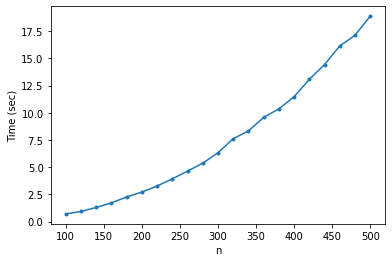

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame
from pyminimax import minimax
from scipy.spatial.distance import pdist

np.random.seed(0)
n_pts = np.arange(100, 501, 20)
elapsed_time = []

def test_run(n):
    X = np.random.rand(n, 2)
    Z = minimax(pdist(X))

for n in n_pts:
    start = time.process_time()
    test_run(n)
    end = time.process_time()
    elapsed_time.append(end - start)

df = DataFrame({'n': n_pts, 'time': elapsed_time}).set_index('n')
ax = df.plot(style='.-', legend=None);
ax.set(ylabel='Time (sec)')
plt.show()